In [3]:
from sklearn import datasets, metrics,svm
# svm - support vector machine classfier used for the classification application 
from sklearn.model_selection import train_test_split 


data = datasets.load_digits()

X = data.data
Y = data.target

print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


In [4]:
# dividing the data into training and testing 

from sklearn.model_selection import train_test_split

# test_size = 0-1 (0-0% 1-100%)
# 0.3 for testing , 0.7 for training 

Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=2)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(1257, 64) (1257,)
(540, 64) (540,)


In [5]:
# create the classification model 
clfModel = svm.SVC() # considereing support vfector classificer for classifcation application
# wiht default values of hyer parameters 

# train the model using training data  (Xtrain , ytrain)
clfModel = clfModel.fit(Xtrain,ytrain)

# test the data using unseen Xtest samples only 
ypred = clfModel.predict(Xtest)




In [6]:
# analysis (parameter evaluations)

acc = metrics.accuracy_score(ypred,ytest)
conf_matrix = metrics.confusion_matrix(ypred,ytest)
report = metrics.classification_report(ypred,ytest)

print("Accuracy of the Model on iris dataset: ",acc*100,'%')

print("confusion matrix:")
print(conf_matrix)

print('Complete report ')
print(report)

Accuracy of the Model on iris dataset:  97.5925925925926 %
confusion matrix:
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  3  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  1  0 58  0  0  0  1]
 [ 0  0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  1]
 [ 0  0  0  1  3  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 41]]
Complete report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.95      0.97        59
           2       1.00      1.00      1.00        54
           3       0.97      1.00      0.98        60
           4       0.94      1.00      0.97        50
           5       0.98      0.97      0.97        60
           6       1.00      1.00      1.00        56
           7       1.00      0.98      0.99        56
           8       0.91      0.90      0.91        48
           9       0.93      0.95 

In [9]:
# dataset 
print(data.data[0,:])
print(data.images.shape)
print(data.data.shape)



[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1797, 8, 8)
(1797, 64)


(8, 8)


Text(0.5, 1.0, 'label: [9]')

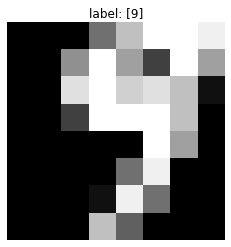

In [29]:
# lets display the single random image 
import matplotlib.pyplot as plt 
import numpy as np 

sample = np.random.randint(0,1796,1)

im = data.images[sample[0],:,:]

label = data.target[sample]
print(im.shape)

plt.figure(1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('label: '+str(label))

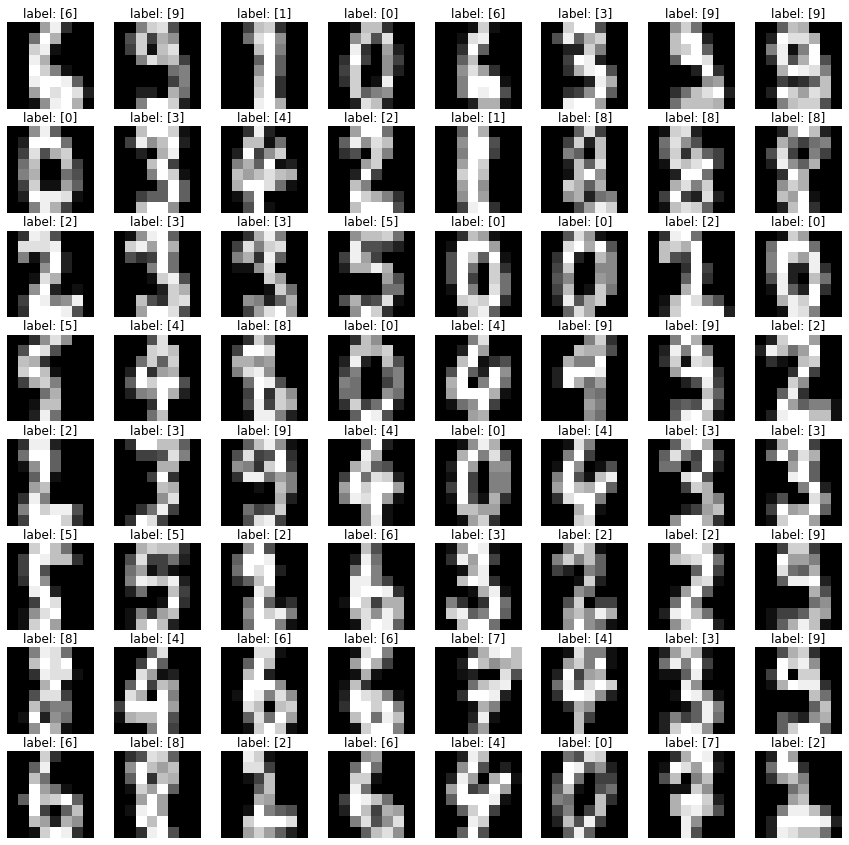

In [31]:

plt.figure(1,figsize=(15,15))
for i in range(1,65,1):
    sample = np.random.randint(0,1796,1)
    im = data.images[sample[0],:,:]
    label = data.target[sample]
    plt.subplot(8,8,i)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    plt.title('label: '+str(label))
    

(898, 64) (898,)
(899, 64) (899,)
(1078, 64) (1078,)
(719, 64) (719,)
(1257, 64) (1257,)
(540, 64) (540,)
(1437, 64) (1437,)
(360, 64) (360,)
[[98.10901001 97.63560501 97.59259259 98.05555556]]
               0.5        0.4        0.3        0.2
Accuracy  98.10901  97.635605  97.592593  98.055556


<AxesSubplot:>

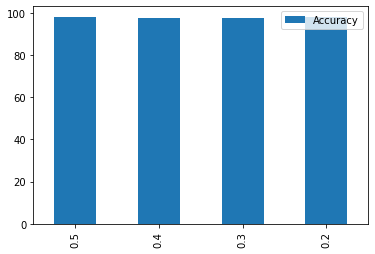

In [40]:
#comparison of only accuracies 50:50 , 60:40,
#70:30, 80:20 training and testing ratio
import numpy as np 
import pandas as pd 
test_ratio = [0.5,0.4,0.3,0.2]

result = np.zeros((1,len(test_ratio)))

for i in range(len(test_ratio)):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=test_ratio[i],random_state=2)
    print(Xtrain.shape,ytrain.shape)
    print(Xtest.shape,ytest.shape)
    # create the classification model 
    clfModel = svm.SVC() # considereing support vfector classificer for classifcation application
    # wiht default values of hyer parameters 

    # train the model using training data  (Xtrain , ytrain)
    clfModel = clfModel.fit(Xtrain,ytrain)

    # test the data using unseen Xtest samples only 
    ypred = clfModel.predict(Xtest)
    acc = metrics.accuracy_score(ypred,ytest)
    result[0,i]=acc*100
print(result)

rFrame = pd.DataFrame(result,columns=test_ratio,index=['Accuracy'])
print(rFrame)


rFrame.T.plot(kind='bar')
